In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Chargement des données
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 2. Normalisation des pixels (entre 0 et 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# 3. Noms des classes pour l'affichage
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'bateau', 'camion']

# 4. Vérification de la forme des données
print(f"Images d'entraînement : {train_images.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step
Images d'entraînement : (50000, 32, 32, 3)


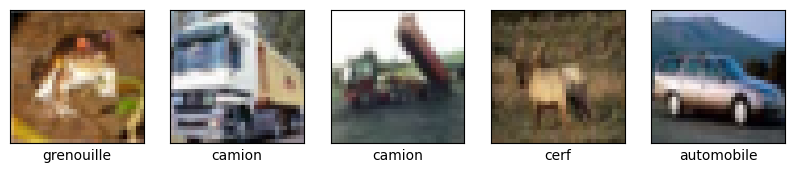

In [3]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [11]:
from tensorflow.keras import layers, models

# 1. On définit l'augmentation (pour que l'IA ne voit jamais exactement la même image)
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

# 2. On construit le réseau
model = models.Sequential([
    data_augmentation,
    
    # Bloc 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    # Bloc 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # Bloc 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    # Final
    layers.Flatten(),
    layers.Dense(128, activation='relu'), # Augmenté à 128 pour gérer la complexité
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

model.summary()

/Users/abdullah/Documents/WorkSpace/IA_Images/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# On compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# On lance l'entraînement (50 époques)
# Ton Mac M2 devrait traiter chaque époque assez rapidement
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - accuracy: 0.3928 - loss: 1.7570 - val_accuracy: 0.4851 - val_loss: 1.4235
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5352 - loss: 1.2995 - val_accuracy: 0.6235 - val_loss: 1.0683
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5914 - loss: 1.1654 - val_accuracy: 0.5602 - val_loss: 1.2755
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6249 - loss: 1.0711 - val_accuracy: 0.6469 - val_loss: 1.0002
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6490 - loss: 1.0186 - val_accuracy: 0.7253 - val_loss: 0.8042
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6611 - loss: 0.9800 - val_accuracy: 0.7147 - val_loss: 0.8082
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6791 - loss: 0.9382 - val_accuracy: 0.6826 - val_loss: 0.9352
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6861 -

KeyboardInterrupt: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


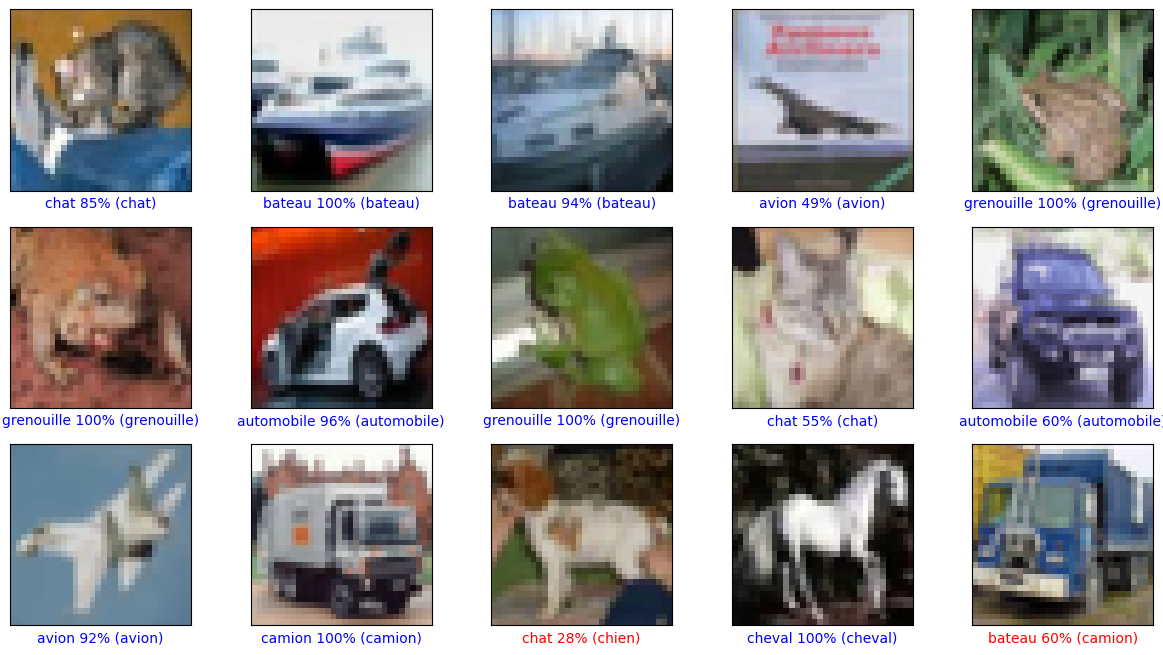

In [6]:
import numpy as np

# 1. Prédire les classes pour les images de test
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# 2. Fonction pour afficher l'image et la prédiction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

# 3. Afficher les 15 premières images et leurs prédictions
plt.figure(figsize=(15, 8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


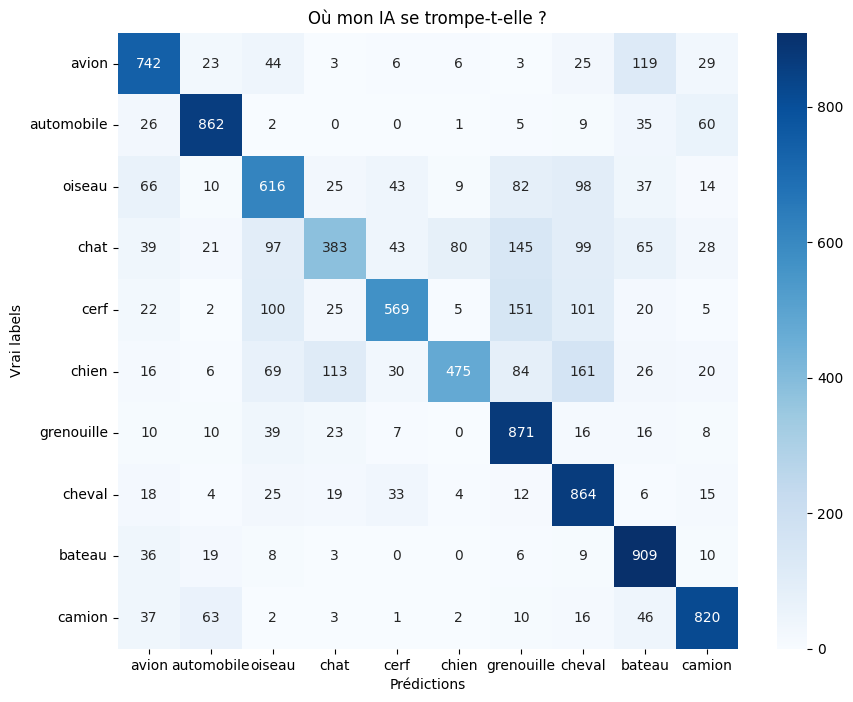

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Obtenir les prédictions finales
y_pred = np.argmax(model.predict(test_images), axis=1)

# 2. Créer la matrice
cm = confusion_matrix(test_labels, y_pred)

# 3. L'afficher joliment
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vrai labels')
plt.title('Où mon IA se trompe-t-elle ?')
plt.show()

In [10]:
from sklearn.metrics import classification_report

# On affiche le rapport détaillé
print(classification_report(test_labels, y_pred, target_names=class_names))

              precision    recall  f1-score   support

       avion       0.73      0.74      0.74      1000
  automobile       0.85      0.86      0.85      1000
      oiseau       0.61      0.62      0.62      1000
        chat       0.64      0.38      0.48      1000
        cerf       0.78      0.57      0.66      1000
       chien       0.82      0.47      0.60      1000
  grenouille       0.64      0.87      0.74      1000
      cheval       0.62      0.86      0.72      1000
      bateau       0.71      0.91      0.80      1000
      camion       0.81      0.82      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000

